<a href="https://colab.research.google.com/github/ShafinZidan/EDA-unknown-dataset/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#3D visualization
import plotly as py
import plotly.graph_objs as go
%matplotlib inline

# **EDA**

In [ ]:
df = pd.read_csv('/content/Task_3_Group_2.csv')
df.head()


,height,length,radius
0,-0.472378,-0.465306,0.940908
1,-0.040632,0.813680,-0.855381
2,10.971097,10.001173,9.817888
3,10.935512,9.789595,10.779161
4,9.980889,10.344121,11.828899


In [ ]:
df.tail()

,height,length,radius
11067,3.052502,5.099280,5.844397
11068,8.792112,10.331518,11.493265
11069,2.076037,2.554931,4.752096
11070,1.708123,2.667884,4.452285
11071,4.762863,1.586413,5.989732


In [ ]:
df.describe()

,height,length,radius
count,11072.000000,11072.000000,11072.000000
mean,4.747957,4.778260,5.266745
std,4.146759,4.144331,3.951194
min,-1.238826,-1.250337,-1.273612
25%,0.825872,0.836864,0.896272
50%,3.696907,3.941158,5.040686
75%,9.393271,9.401615,9.379273
max,13.117229,13.991054,13.820838


In [ ]:
df.shape #rows,columns

(11072, 3)

In [ ]:
df.nunique()

height    11072
length    11072
radius    11072
dtype: int64

**Checking Null Values**

In [ ]:
df.isnull().sum() #shows total null values in each column

height    0
length    0
radius    0
dtype: int64

No Categorical Values in Dataset

**Correlation Matrix**

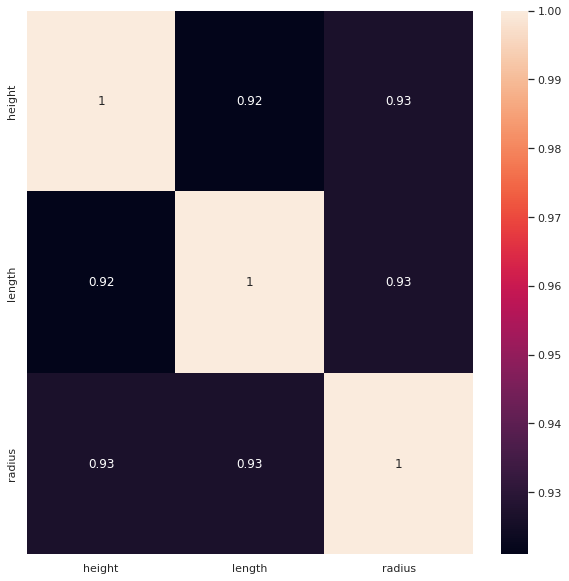

In [ ]:
correlation=df.corr()
sns.set(rc = {'figure.figsize':(10, 10)})
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


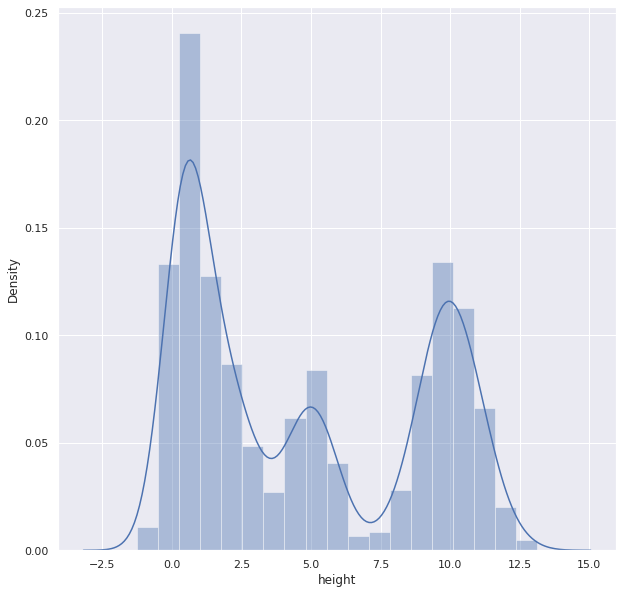

In [ ]:
sns.distplot(df.height)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


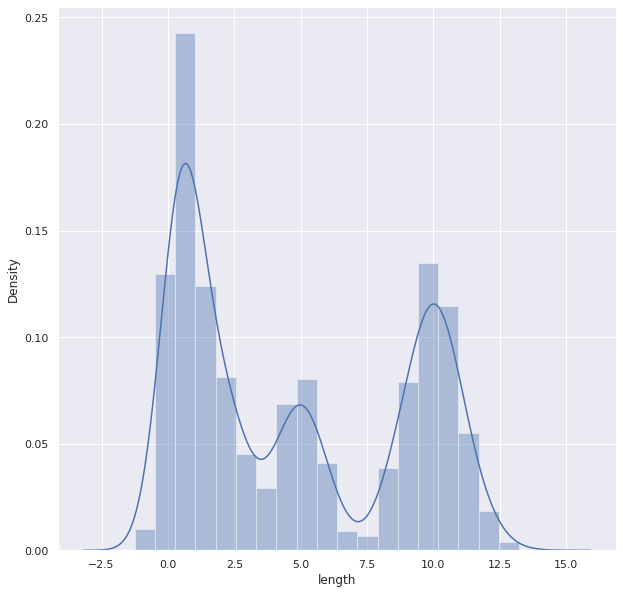

In [ ]:
sns.distplot(df.length)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


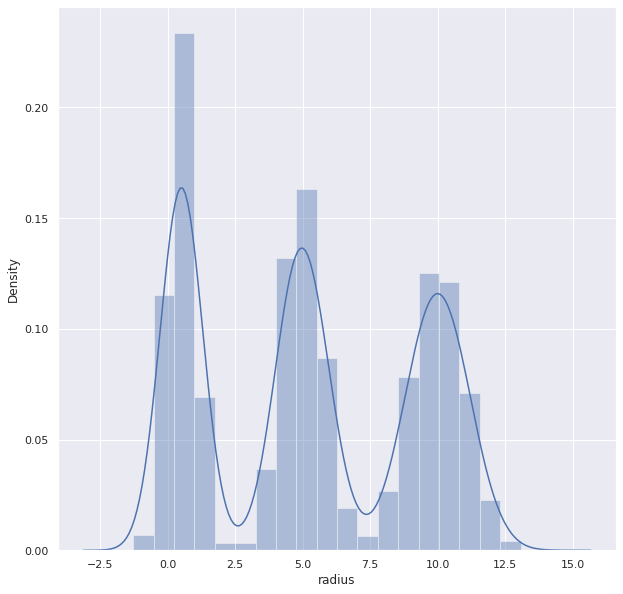

In [ ]:
sns.distplot(df.radius)

**Visualization**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11072 entries, 0 to 11071
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  11072 non-null  float64
 1   length  11072 non-null  float64
 2   radius  11072 non-null  float64
dtypes: float64(3)
memory usage: 259.6 KB


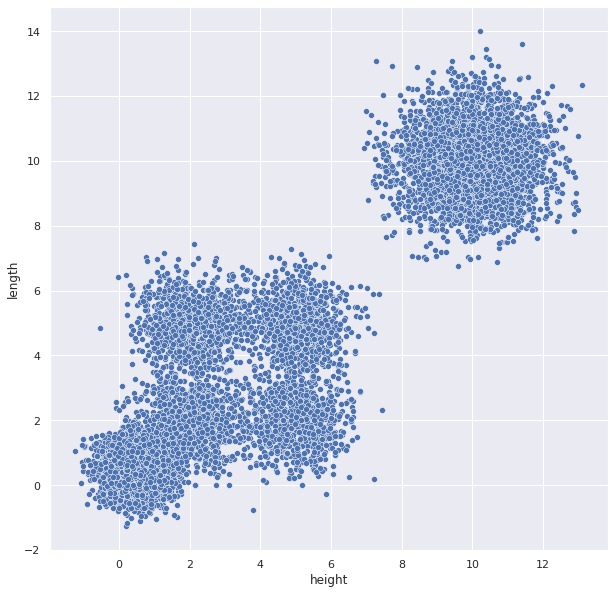

In [ ]:
#scatterplot plot
sns.scatterplot(data = df,x=df.height,y=df.length)

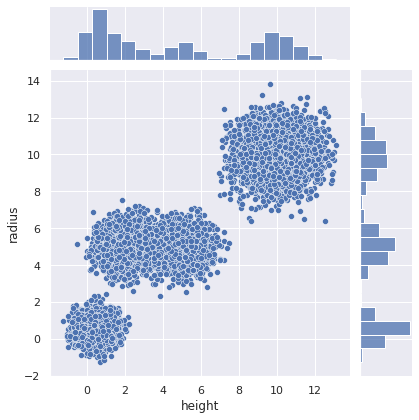

In [ ]:
sns.jointplot(x='height',y='radius',data=df, palette='Paired')

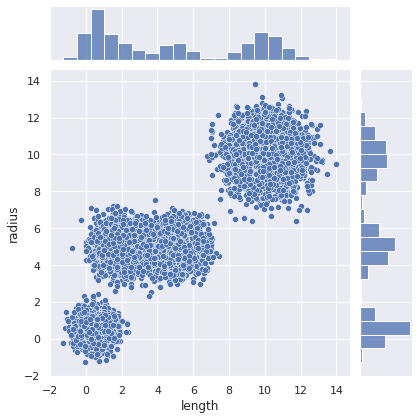

In [ ]:
sns.jointplot(x='length',y='radius',data=df, palette='Paired')

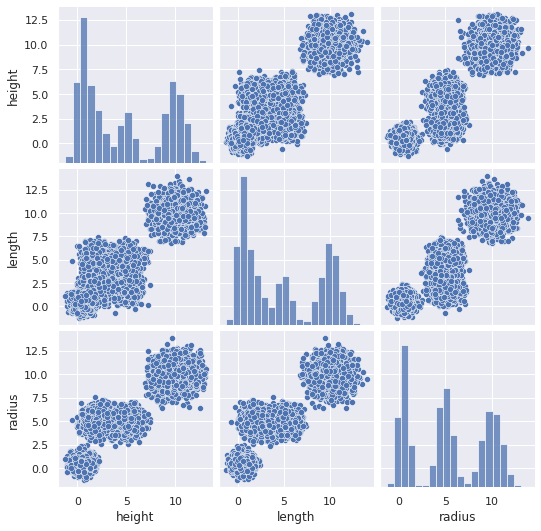

In [ ]:
sns.pairplot(df)  #Pair plot

# **Feature Scaling**

In [ ]:
X=df

In [ ]:
#Standardization for Numerical features
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
pd.DataFrame(X)

,0,1,2
0,-1.258952,-1.265296,-1.094867
1,-1.154831,-0.956670,-1.549507
2,1.500792,1.260312,1.151892
3,1.492210,1.209257,1.395190
4,1.261990,1.343066,1.660878
...,...,...,...
11067,-0.408881,0.077464,0.146203
11068,0.975301,1.340025,1.575929
11069,-0.644369,-0.536499,-0.130257
11070,-0.733096,-0.509243,-0.206139


# **KMEANS CLUSTERING**

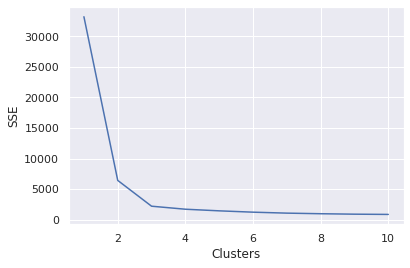

In [ ]:
#elbow method
wcss = []  #WCSS (Within-Cluster Sum of Square)
          #i.e. the sum of the square distance between points in a cluster and the cluster centroid.
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
#predicting cluster
clustering = KMeans(n_clusters = 3, init = 'k-means++',  random_state=42)
Y =clustering.fit_predict(X)
print(Y)

[0 0 1 ... 2 2 2]


**Add new cluster column to dataset**

In [ ]:
df['cluster'] = Y




In [ ]:
df

,height,length,radius,cluster
0,-0.472378,-0.465306,0.940908,0
1,-0.040632,0.813680,-0.855381,0
2,10.971097,10.001173,9.817888,1
3,10.935512,9.789595,10.779161,1
4,9.980889,10.344121,11.828899,1
...,...,...,...,...
11067,3.052502,5.099280,5.844397,2
11068,8.792112,10.331518,11.493265,1
11069,2.076037,2.554931,4.752096,2
11070,1.708123,2.667884,4.452285,2


**Visualizing Clusters**

In [ ]:

import plotly.graph_objects as go

PLOT = go.Figure()

for C in list(df.cluster.unique()):

 PLOT.add_trace(go.Scatter3d(x = df[df.cluster == C]['height'],
                                y = df[df.cluster == C]['length'],
                                z = df[df.cluster == C]['radius'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))

PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'height', titlefont_color = 'black'),
                                yaxis=dict(title = 'length', titlefont_color = 'black'),
                                zaxis=dict(title = 'radius', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))


# **Performance Metrics**

Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X,Y)
print(score)

0.7032742273995841


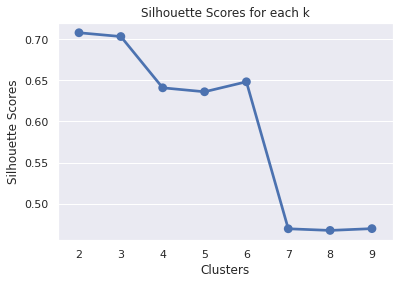

In [ ]:
silhouette ={}

for i in range(2,10):
    km = KMeans(n_clusters=i,init='k-means++', random_state=42)
    km.fit(X)
    silhouette[i]=  silhouette_score(X,km.labels_)
#plot elbow curve
sns.pointplot(x=list(silhouette.keys()),y=list(silhouette.values()))
plt.xlabel('Clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores for each k')
plt.show()